#**IMPORTING Libraries** :

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg


#Loading the Dataset

In [2]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10

# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [3]:
#To categorical
y_train = keras.utils.to_categorical(trainY, 10)
y_valid = keras.utils.to_categorical(testY, 10)

In [4]:
#Normalize
x_train = trainX/255
x_valid = testX / 255

#Creating the model

In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu",
                 ))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(512, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

In [7]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=[keras.metrics.CategoricalAccuracy()],optimizer='Adam')

#Data Augmentation

In [8]:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

In [19]:
batch_size = 64
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

In [20]:
datagen.fit(x_train)

##Training the model

In [25]:
model.fit(img_iter,
          epochs=24,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/24
781/781 [==============================] - 43s 54ms/step - loss: 0.2990 - categorical_accuracy: 0.8986 - val_loss: 0.4657 - val_categorical_accuracy: 0.8536
Epoch 2/24
781/781 [==============================] - 42s 54ms/step - loss: 0.2845 - categorical_accuracy: 0.9020 - val_loss: 0.4891 - val_categorical_accuracy: 0.8419
Epoch 3/24
781/781 [==============================] - 42s 54ms/step - loss: 0.2839 - categorical_accuracy: 0.9025 - val_loss: 0.7190 - val_categorical_accuracy: 0.8014
Epoch 4/24
781/781 [==============================] - 42s 54ms/step - loss: 0.2687 - categorical_accuracy: 0.9087 - val_loss: 0.5021 - val_categorical_accuracy: 0.8605
Epoch 5/24
781/781 [==============================] - 42s 54ms/step - loss: 0.2553 - categorical_accuracy: 0.9128 - val_loss: 0.4498 - val_categorical_accuracy: 0.8568
Epoch 6/24
781/781 [==============================] - 42s 54ms/step - loss: 0.2481 - categorical_accuracy: 0.9161 - val_loss: 0.4445 - val_categorical_accuracy:

In [26]:
_,acc = model.evaluate(x_valid,y_valid,verbose=0)

In [27]:
acc

0.8680999875068665

In [66]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#Making Predictions

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=[keras.metrics.CategoricalAccuracy()],optimizer='Adam')

In [28]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

In [45]:
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, target_size=(32,32))
    return image

In [59]:
def predict(img,model):
  image = load_and_scale_image(img)
  image = image_utils.img_to_array(image)
  # This reshape corresponds to 1 image of 28x28 pixels with one color channel
  image = image.reshape(1,32,32,3)
  image = image / 255
  prediction = model.predict(image)
  classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]
  print("It's a "+classes[np.argmax(prediction)])
  print("Acc : "+str(prediction[0,np.argmax(prediction)]*100)[0:5])
  show_image(img)

1/1 [==============================] - 0s 22ms/step
It's a cat
Acc : 99.02


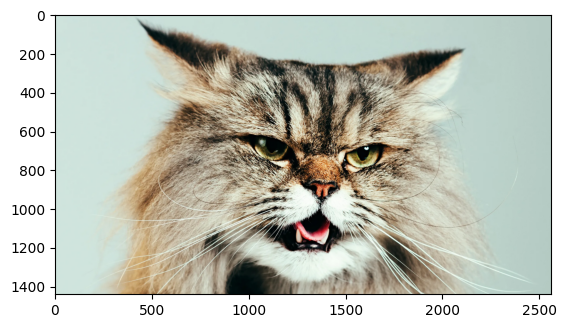

In [61]:
predict("./cat.jpg",model)

1/1 [==============================] - 0s 22ms/step
It's a dog
Acc : 99.77


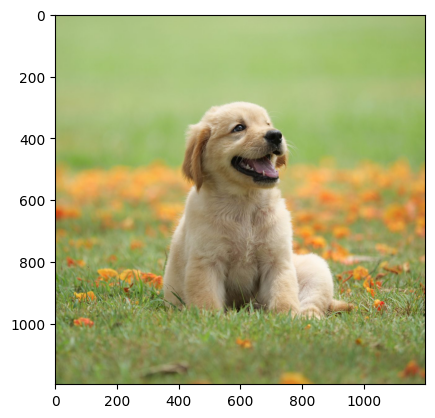

In [67]:
predict("./dog.jpg",model)

1/1 [==============================] - 0s 30ms/step
It's a frog
Acc : 99.99


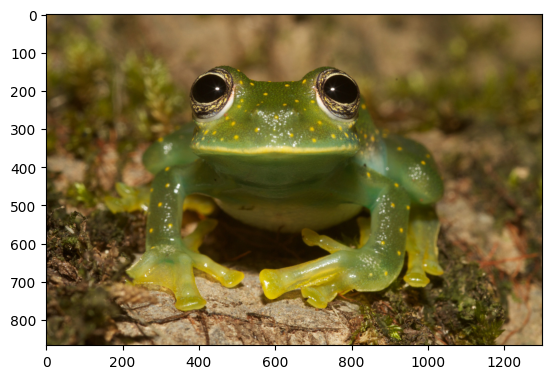

In [68]:
predict("./frpg.jpg",model)

1/1 [==============================] - 0s 19ms/step
It's a airplane
Acc : 62.65


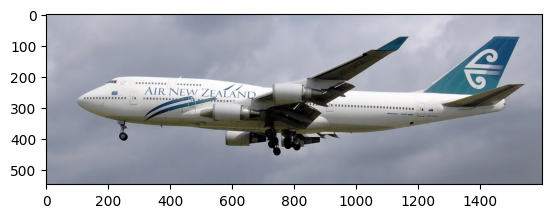

In [69]:
predict("./airplane.jpg",model)

In [65]:
from sklearn.metrics import classification_report
import numpy as np

Ytest = np.argmax(y_valid, axis=1) # Convert one-hot to index
y_pred = np.argmax(model.predict(x_valid), axis=-1)
print(classification_report(Ytest, y_pred))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1000
           1       0.90      0.97      0.93      1000
           2       0.89      0.79      0.84      1000
           3       0.73      0.80      0.76      1000
           4       0.87      0.86      0.86      1000
           5       0.89      0.69      0.78      1000
           6       0.74      0.97      0.84      1000
           7       0.93      0.90      0.91      1000
           8       0.95      0.94      0.94      1000
           9       0.92      0.90      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

